# **Analyzing Ford GoBike System Data**

### Introduction


Ford GoBike is a regional public bicycle-sharing system in California's San Francisco Bay Area. The Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose, starting operation as a Bay Area Bike Share in August 2013. The program formally launched on 28 June 2017 in a collaboration with Ford Motor Company as Ford GoBike.

Like other bike-sharing systems, Ford GoBike consists of a fleet of specially designed, robust and durable bikes that are locked into a city-wide network of docking stations. The bikes can be unlocked from one station and sent back to any other station.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
df = pd.read_csv('201904-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  bike_share_for_all_trip  239111 non-null  object 
dtypes: f

In [5]:
df.isnull().sum()

duration_sec                0
start_time                  0
end_time                    0
start_station_id           64
start_station_name         64
start_station_latitude      0
start_station_longitude     0
end_station_id             64
end_station_name           64
end_station_latitude        0
end_station_longitude       0
bike_id                     0
user_type                   0
bike_share_for_all_trip     0
dtype: int64

In [6]:
df['user_type'].value_counts()

Subscriber    203197
Customer       35914
Name: user_type, dtype: int64

In [7]:
# Removing the rows with no station id
df_clean = df[df['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239047 non-null  int64  
 1   start_time               239047 non-null  object 
 2   end_time                 239047 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239047 non-null  float64
 6   start_station_longitude  239047 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239047 non-null  float64
 10  end_station_longitude    239047 non-null  float64
 11  bike_id                  239047 non-null  int64  
 12  user_type                239047 non-null  object 
 13  bike_share_for_all_trip  239047 non-null  object 
dtypes: f

In [8]:
df_clean.duplicated().sum()

0

In [9]:
# Changing start_time and end_time to datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

C:\Users\Dhruvesh\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
# Extract dayofweek, hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

C:\Users\Dhruvesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dhruvesh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df_clean['start_time_dayofweek'].value_counts()

Tue    43598
Mon    40906
Wed    38850
Thu    38845
Fri    35450
Sat    23056
Sun    18342
Name: start_time_dayofweek, dtype: int64

In [12]:
# Converting the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

C:\Users\Dhruvesh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             239047 non-null  int64         
 1   start_time               239047 non-null  datetime64[ns]
 2   end_time                 239047 non-null  datetime64[ns]
 3   start_station_id         239047 non-null  float64       
 4   start_station_name       239047 non-null  object        
 5   start_station_latitude   239047 non-null  float64       
 6   start_station_longitude  239047 non-null  float64       
 7   end_station_id           239047 non-null  float64       
 8   end_station_name         239047 non-null  object        
 9   end_station_latitude     239047 non-null  float64       
 10  end_station_longitude    239047 non-null  float64       
 11  bike_id                  239047 non-null  int64         
 12  user_type       

**What is the structure of your dataset?**

The dataset has 20000+ bike rides that happen in 2019 in the San Francisco Bay Area. The dataset contained features about:

trip duration: how long the trip took in seconds


start time/end time: start and end date/time for the bike rides.


stations: start and end station, name along with their location (latitude/longitude)


rented bikes: bike id

**The dataset was assessed and cleaned with features that may be helpful to perform  analysis:**

rental time: hour of the day, weekday

**What is/are the main feature(s) of interest in your dataset?**

I am interested in investigate duration of biking time.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

I think the following features may help to support my investigation into the feature (duration) I am interested.

start_time - extraction of  day_of_week, hours for further investigation.
user_type

# Univariate exploration

## 1. Histogram for minutes

In [14]:
#converting secs to minutes 
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean.info()

C:\Users\Dhruvesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             239047 non-null  int64         
 1   start_time               239047 non-null  datetime64[ns]
 2   end_time                 239047 non-null  datetime64[ns]
 3   start_station_id         239047 non-null  float64       
 4   start_station_name       239047 non-null  object        
 5   start_station_latitude   239047 non-null  float64       
 6   start_station_longitude  239047 non-null  float64       
 7   end_station_id           239047 non-null  float64       
 8   end_station_name         239047 non-null  object        
 9   end_station_latitude     239047 non-null  float64       
 10  end_station_longitude    239047 non-null  float64       
 11  bike_id                  239047 non-null  int64         
 12  user_type       

In [15]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,duration_min
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,Tue,22,838.416667
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,Tue,20,895.416667
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,Tue,10,1301.200000
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,Tue,10,1316.150000
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,Tue,23,18.800000


(0, 100)

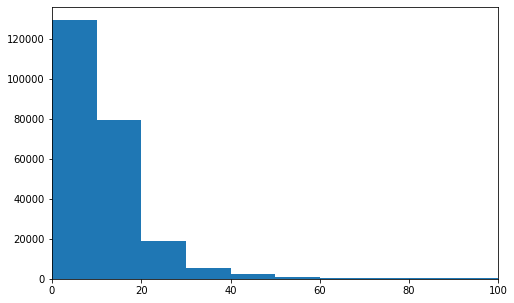

In [16]:
#Histogram for duration of minutes
binsize = 10
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df_clean, x = 'duration_min', bins=bins);

plt.xlim(0,100)

Most of the data is below 50


In [17]:

df_clean['duration_min'].describe()

count    239047.000000
mean         13.374141
std          33.163460
min           1.016667
25%           5.816667
50%           9.300000
75%          14.600000
max        1435.233333
Name: duration_min, dtype: float64

Calculating IQR

IQR = Q3 - Q1 = 14.60 - 5.81


Upper Wisker Bound = (1.5 * IQR) + Q3 = 13.18 + 14.6 = 27.78

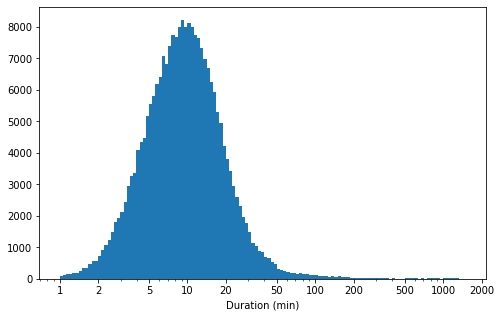

In [18]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
xtick=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(xtick,xtick);
plt.xlabel('Duration (min)');

It now looks like a normal distribution

In [19]:
#Cleaning with duration_min < 100 min
df_clean = df_clean[df_clean['duration_min'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237649 entries, 4 to 239110
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             237649 non-null  int64         
 1   start_time               237649 non-null  datetime64[ns]
 2   end_time                 237649 non-null  datetime64[ns]
 3   start_station_id         237649 non-null  float64       
 4   start_station_name       237649 non-null  object        
 5   start_station_latitude   237649 non-null  float64       
 6   start_station_longitude  237649 non-null  float64       
 7   end_station_id           237649 non-null  float64       
 8   end_station_name         237649 non-null  object        
 9   end_station_latitude     237649 non-null  float64       
 10  end_station_longitude    237649 non-null  float64       
 11  bike_id                  237649 non-null  int64         
 12  user_type       

## 2.Countplot for Start_time_hour

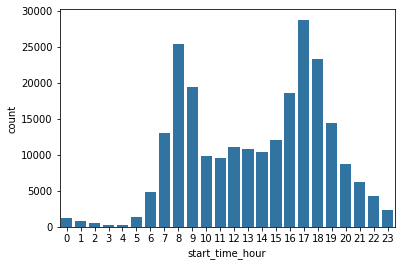

In [20]:
color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'start_time_hour', color = color);

We can see that 5pm have the highest number of bikers followed by 8am.

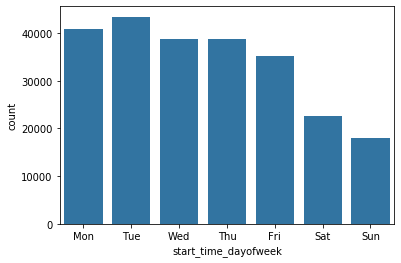

In [21]:
sb.countplot(data = df_clean, x = 'start_time_dayofweek', color = color);

Tuesday has the highest number of bikers as seen in the graph followed by Monday.

## Countplot for user type

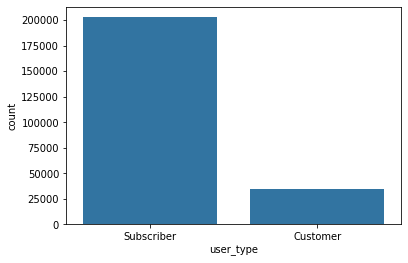

In [22]:
sb.countplot(data = df_clean, x = 'user_type', color = color);

Subscribers user are almost 4 times more than customer users.

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

On plotting the histogram for duration inminutes, I noticed most were below 50 minutes, but with a few over 50 as well resulting in a long tail . So, I transformed it into a log histogram lot and removed the tail.

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

Apart from the one mentioned above, I made the data tidy by removing all the missing and null values during the cleaning part of the process.

# Bivariate exploration

## 1. Heatmap for all columns

In [23]:
#Store all column names in a list
numeric_col = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'duration_min']
categoric_col = ['start_time_dayofweek', 'start_time_hour', 'user_type']

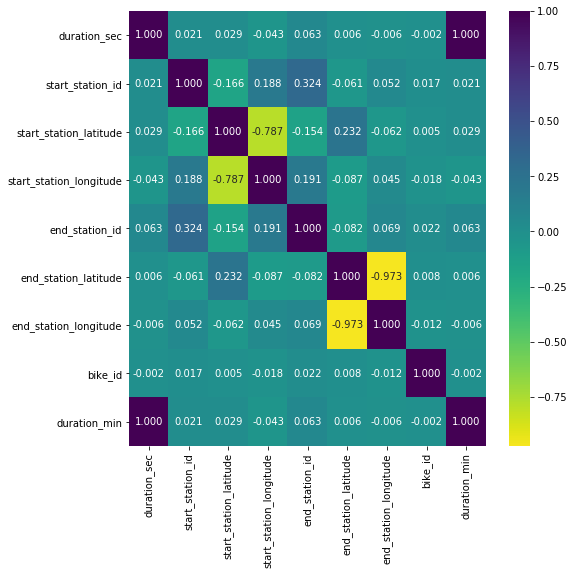

In [24]:
plt.figure(figsize = [8, 8])
sb.heatmap(df_clean[numeric_col].corr(), annot = True, fmt = '.3f', cmap = 'viridis_r', center = 0);


The correlation cofficients indicate there might be correlations between the following pairs of columns: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). 

## 2.Countplots for start_time_hour,day_of_week and user_type

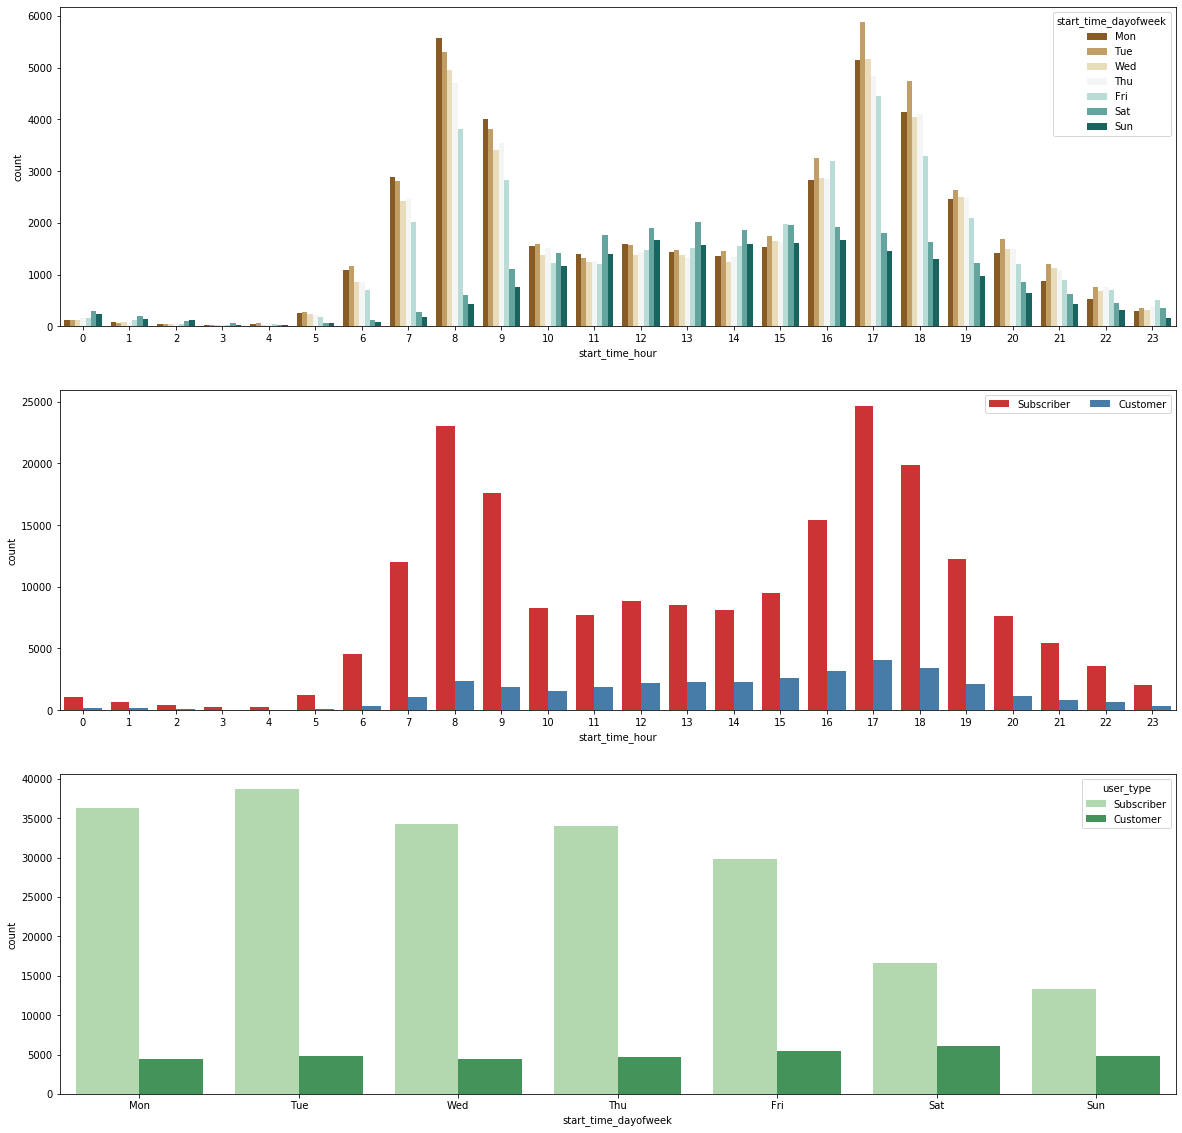

In [25]:
plt.figure(figsize = [20, 20]);


plt.subplot(3, 1, 1);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_time_dayofweek', palette = 'BrBG');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'Set1');
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

ax = plt.subplot(3, 1, 3);
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'Greens');




**Observation**


On Tuesday at 5:00 PM we see  the highest biker counts across all 7 days and 24 hours.

5:00 PM has the most 'Subscriber' as well as 'Customer' bikers compared to other hours.

Tuesday has the most 'Subscriber' bikers compared to other days, whereas  Saturday has the most 'Customer' bikers compared to other days.


## 3. Boxplot for trip duration per user type

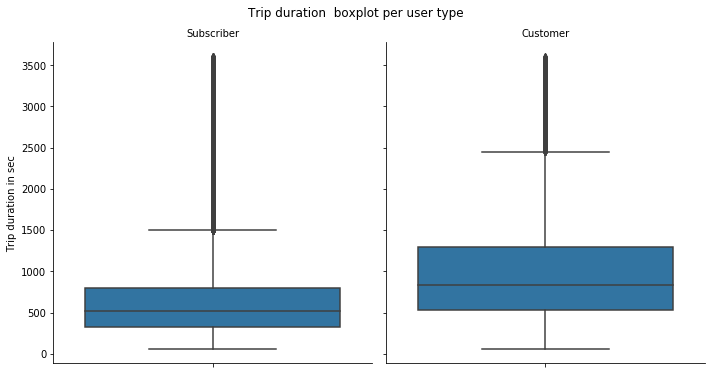

In [26]:
# Boxplt for duration distribution per user type
data = df_clean.query('duration_sec < 3600')
g = sb.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration in sec")
g.fig.suptitle('Trip duration  boxplot per user type', y=1.03, fontsize=12 );

We can see that trip duration are longer for customers than subscribers.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

Trip duration are longer for customers than subscribers.

Bikers like to ride at 5pm in early evening or at 8 am in early morning.

Tuesday has the most  bikers compared to other days.


**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Observations from above plots:**

Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.

5:00 PM has the most 'Subscriber' and 'Customer' bikers compared to other hours.

Tuesday has the most 'Subscriber' bikers compared to other days,whereas Saturday has the most 'Customer' bikers compared to other days.


# Multivariate Exploration

## 1. Hour vs user type per day

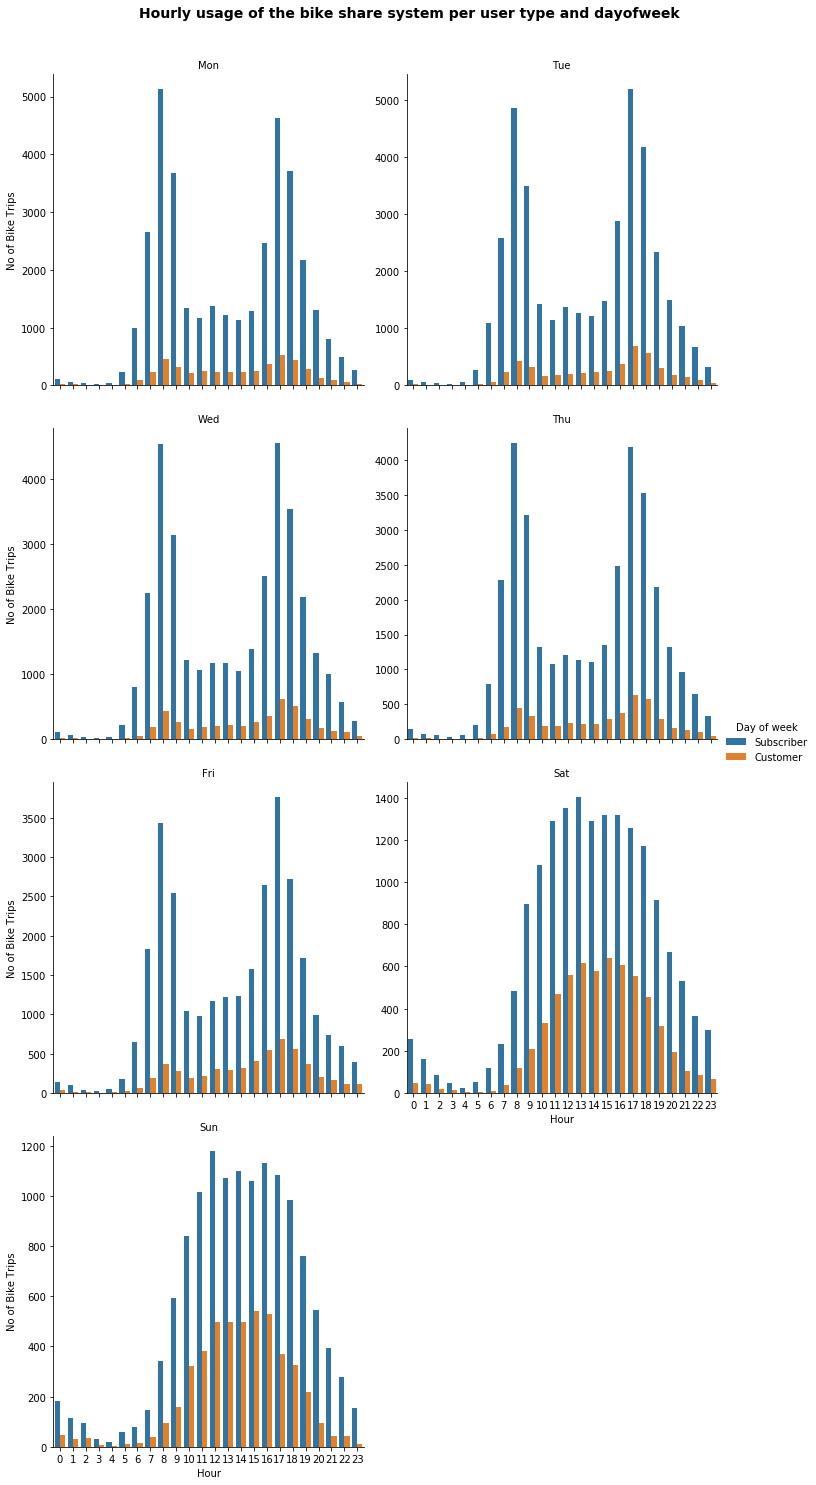

In [27]:

g = sb.catplot(data=df_clean, x='start_time_hour', col="start_time_dayofweek", hue='user_type', kind='count', sharey = False,col_wrap=2)
g.set_axis_labels("Hour", "No of Bike Trips")
g._legend.set_title('Day of week')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and dayofweek', y=1.03, fontsize=14, fontweight='semibold');

We can see that in  general subsribers are more than customers on every day of the week. We can also see that the morning and evening times see the highest count of bikers, with maximum number of bike rides on the weekends.

In [ ]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df_clean, x = 'start_time_dayofweek', y = 'duration_min', hue = 'user_type',
           palette = 'viridis_r', linestyles = '', dodge = 0.3);
plt.title('Biking durations for bikers  across dayofweek and user type');
plt.ylabel('Mean Duration (min)');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);


We see that duration is more customer user type across all days, with maximum being on the weekends.

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

The features we studied here are exactly related to each other. We haven't observed features that reinforced one another in looking at features to my interest.

**Were there any interesting or surprising interactions between features?**

Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.

We see that in general 4:00 AM has least bikers while 5:00 PM has the most bikers.

'Customer' bikers bike longer on average compared to 'Subscriber' bikers.

There are more bikers on Saturday and on Sundays on average.
